<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/architecture-patterns/1_residual_connection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Residual block where filter size changes

In [2]:
input = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters = 32, kernel_size=3, activation="relu")(input)
residual = x

In [3]:
residual.shape

TensorShape([None, 30, 30, 32])

In [4]:
x = layers.Conv2D(filters = 64, kernel_size=3, activation="relu", padding='same')(x)

In [5]:
x.shape

TensorShape([None, 30, 30, 64])

In [6]:
#use Conv2D with kernel size 1 and required units to reshape to desired shape
residual = layers.Conv2D(64, kernel_size=1)(residual)

In [7]:
residual.shape

TensorShape([None, 30, 30, 64])

In [8]:
x = layers.add([x, residual])

## Residual block when using max pooling

In [9]:
inputs = keras.Input(shape=(32, 32, 3))

In [10]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)

In [11]:
residual = x 

In [12]:
residual.shape

TensorShape([None, 30, 30, 32])

In [13]:
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)

In [14]:
x.shape

TensorShape([None, 30, 30, 64])

In [15]:
x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)

In [16]:
x.shape

TensorShape([None, 15, 15, 64])

In [17]:
#Use Conv2D with strides = 2
residual = layers.Conv2D(filters=64, kernel_size=1, strides=2)(residual)

In [18]:
residual.shape

TensorShape([None, 15, 15, 64])

In [19]:
x = layers.add([x, residual])

In [20]:
x.shape

TensorShape([None, 15, 15, 64])

## Simple Covnet with structured blocks

In [25]:
input = keras.Input(shape=(32, 32, 3))

x = layers.Rescaling (1./255)(input)

In [26]:
def get_residual_block(x, filters, pooling=False):

  residual = x

  x = layers.Conv2D(filters, kernel_size=3, padding="same", activation="relu")(x)
  x = layers.Conv2D(filters, kernel_size=3, padding="same", activation="relu")(x)
  
  if pooling:
    x = layers.MaxPool2D(pool_size=2, padding="same")(x)
    residual = layers.Conv2D(filters, padding="same", kernel_size=1, strides=2)(residual)
  else:
    residual = layers.Conv2D(filters, 1)(residual)

  x = layers.add([x, residual])

  return x   

In [27]:
x = get_residual_block(x, filters=32, pooling=True)
x = get_residual_block(x, filters=64, pooling=True)
x = get_residual_block(x, filters=128, pooling=False)


In [28]:
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(input, output)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 32, 32, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 32)   896         ['rescaling_1[0][0]']            
                                                                                                  
 conv2d_8 (Conv2D)              (None, 32, 32, 32)   9248        ['conv2d_7[0][0]']               
                                                                                              

In [34]:
from keras.utils.vis_utils import plot_model

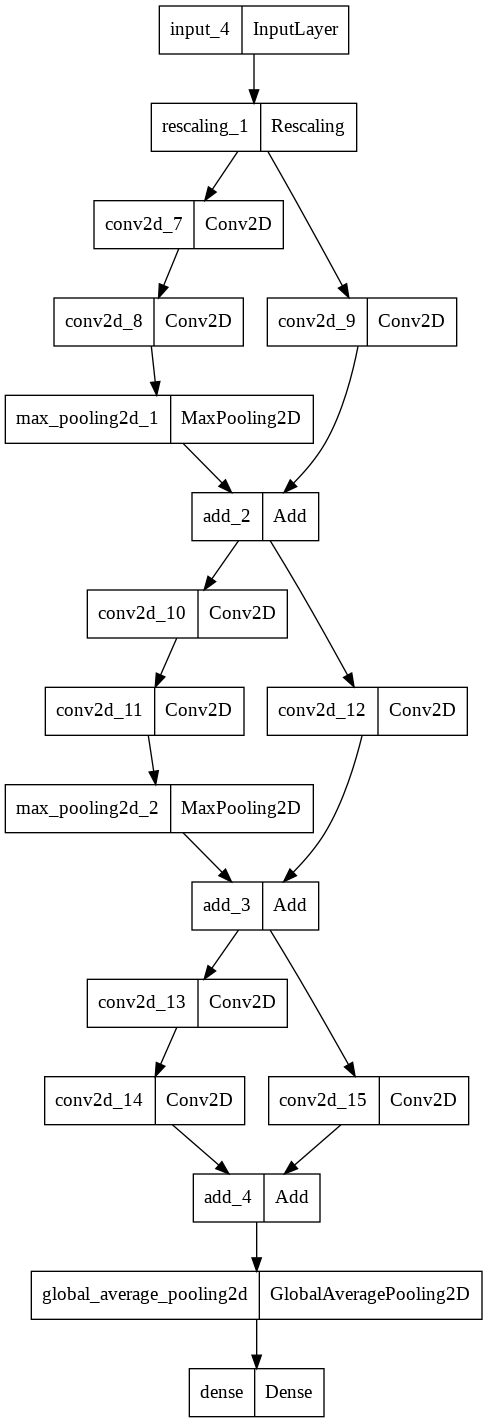

In [35]:
plot_model(model)